<a href="https://colab.research.google.com/github/aishwaryakham/capstone_project_EDA/blob/main/EDA_project_on_YOUTUBE_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***EDA ( Exploratory Data Analysis) on 2023 You Tube Statistics***
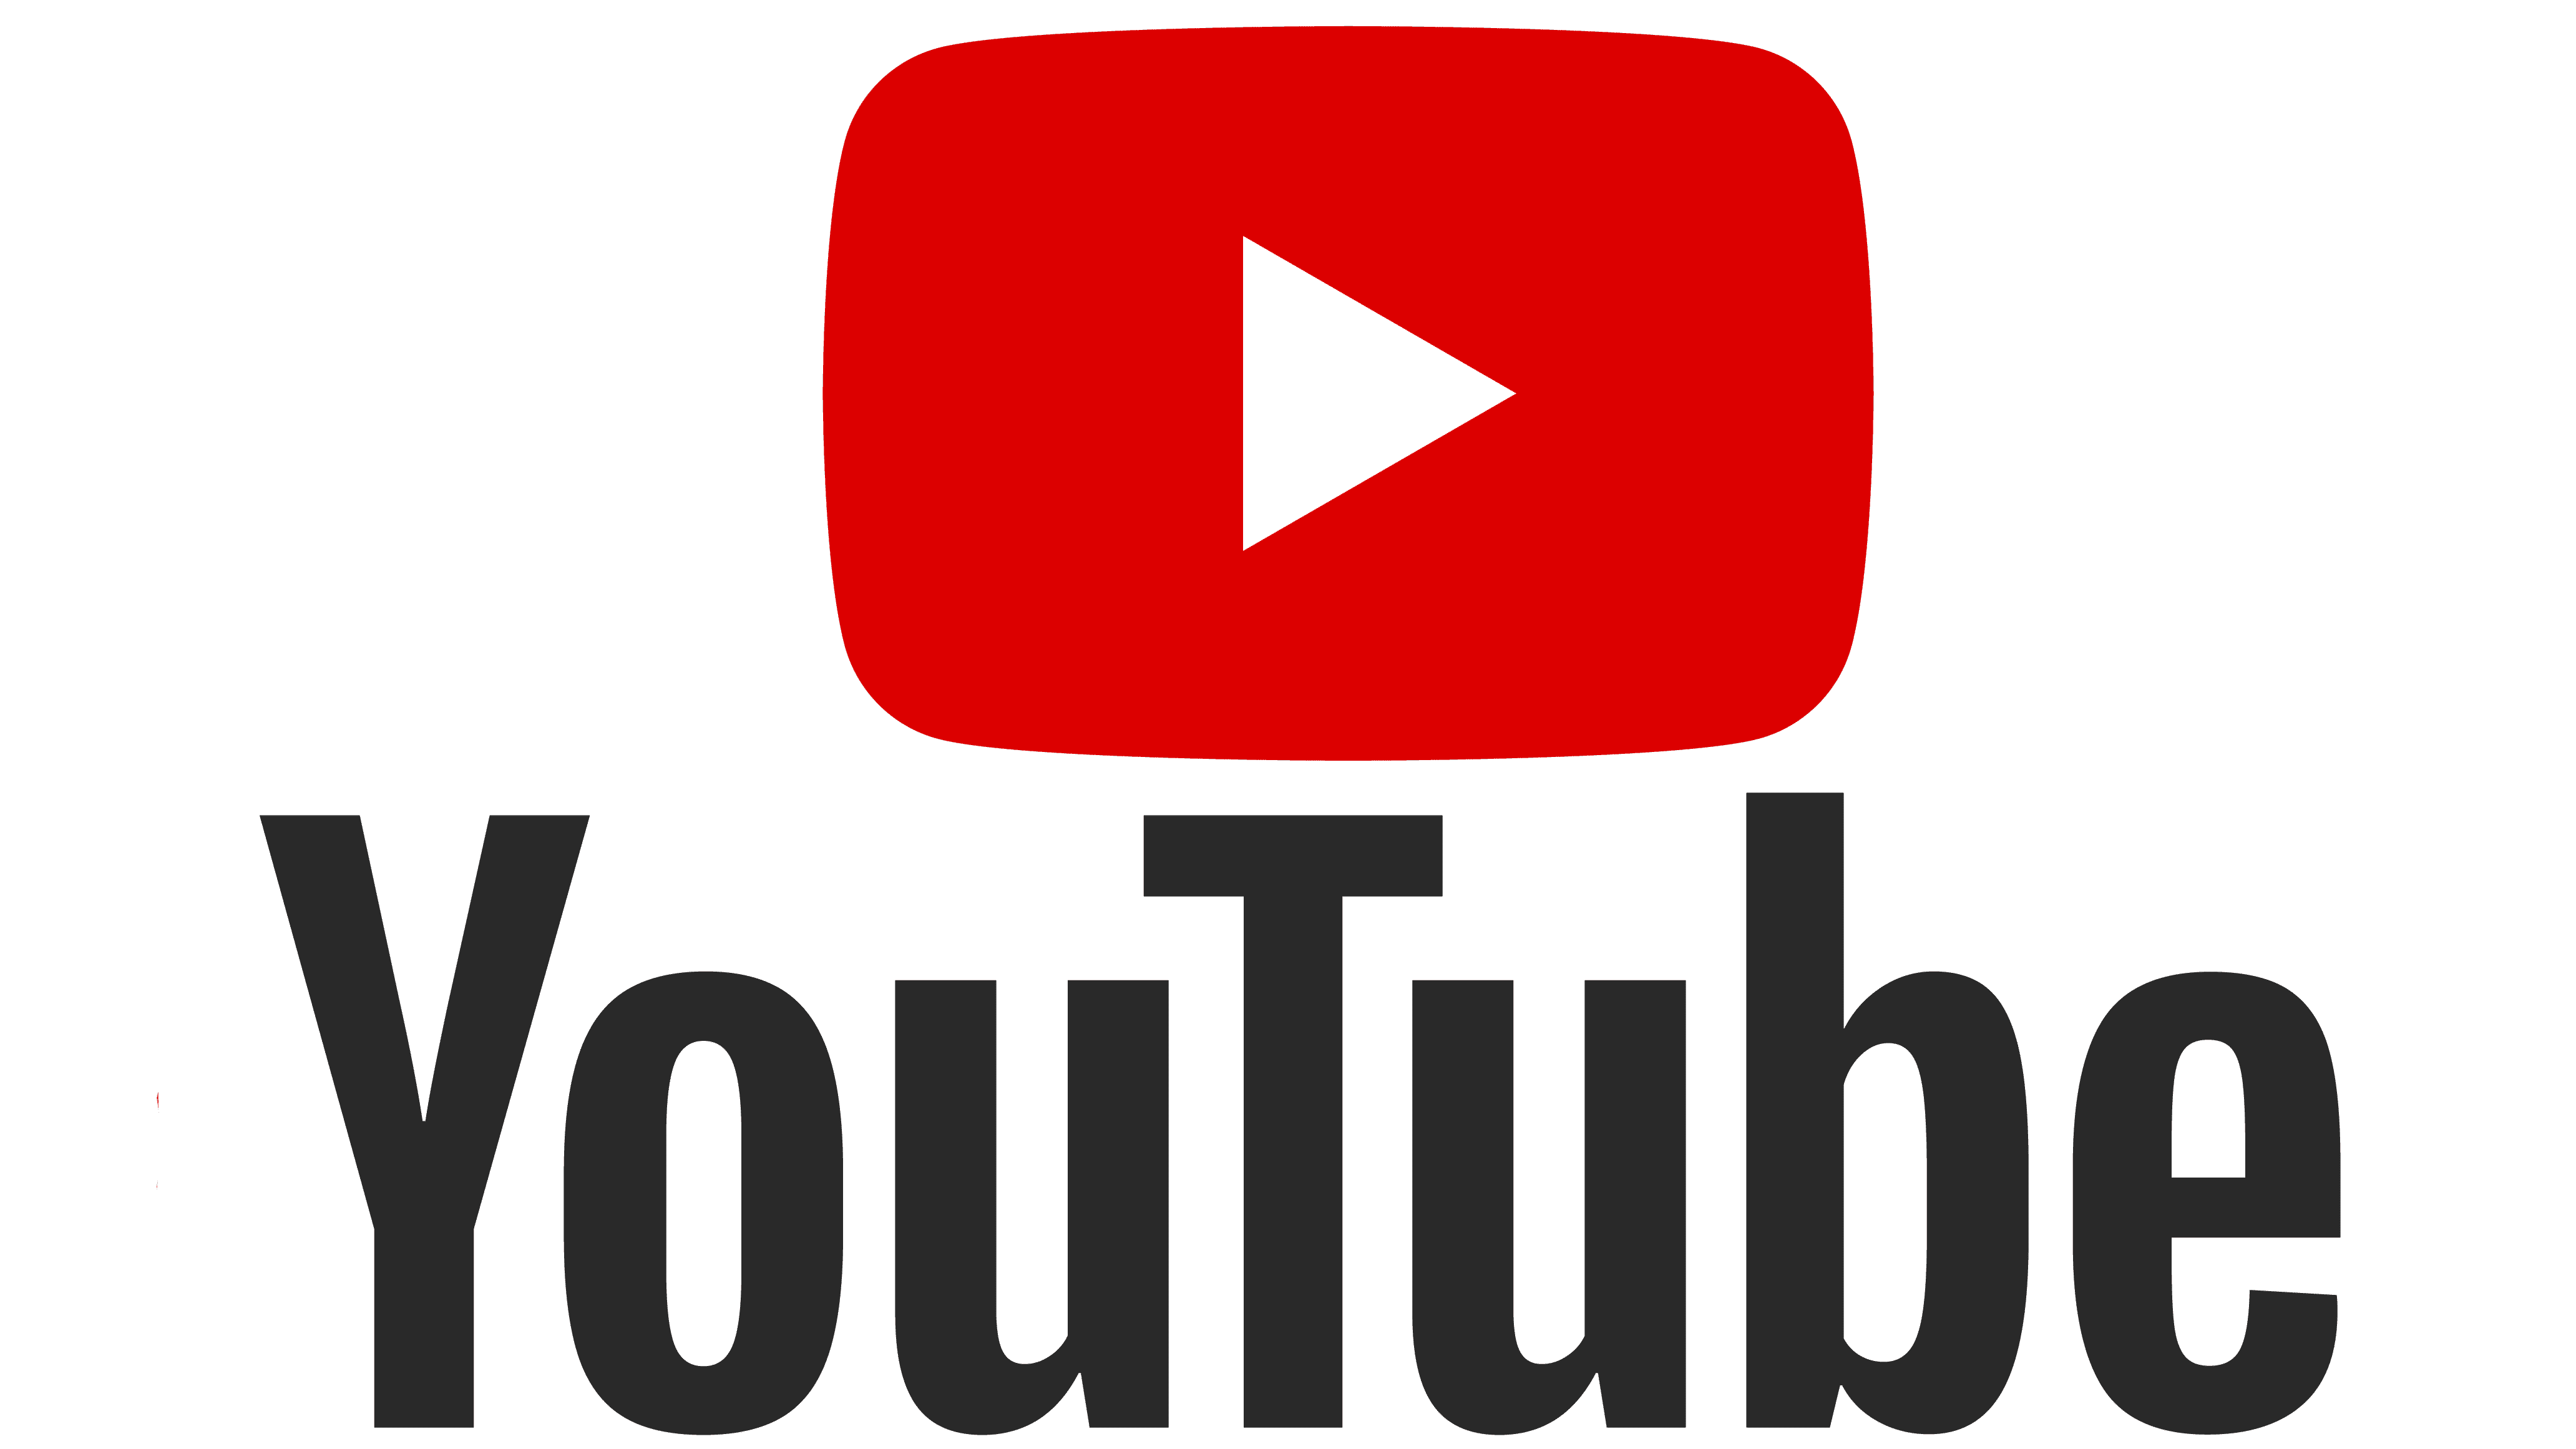


The project is to analyze and visualize trends and tap into opportuties for billion-dollar success. I will mainly analyze the following criteria of the dataset:
* Earning 💵
* Channel Type 🖥️
* Geogaphical Distribution 🗺️

**EDA ( Exploratory Data Analysis)** : EDA builds a robust understanding of the data, and issues associated with either the info or process. It's a scientific approach to getting the story of the data.
TYPES OF EXPLORATORY DATA ANALYSIS: Univariate Non-graphical, Multivariate Non-graphical.





In [ ]:

##Load the required libraries
## Data ##
import pandas as pd
import numpy as np


## Image Request ##
import requests
from io import BytesIO

## Visualization ##
import missingno as msno
from PIL import Image
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Remove Warnings ##
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('/content/Global YouTube Statistics.csv',encoding='ISO-8859-1')

In [ ]:
# understanding the data
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,average_yearly_earnings,average_monthly_earnings
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,57600000.0,4782300.0
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,34350000.0,2868500.0
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,50350000.0,4196900.0
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,46500000.0,3877950.0
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756,1223400.0,104000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [ ]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [ ]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,average_yearly_earnings,average_monthly_earnings
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,57600000.0,4782300.0
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,34350000.0,2868500.0
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,50350000.0,4196900.0
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,46500000.0,3877950.0
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756,1223400.0,104000.0


In [ ]:
df.tail()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,average_yearly_earnings,average_monthly_earnings
989,990,Migos ATL,12400000,6.993406e+09,Music,Migos ATL,99,United States,US,Entertainment,...,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,1274100.0,105000.0
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280,14100000.0,1169050.0
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,1647100.0,137550.0
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501,98700.0,8234.0
994,995,Make Joke Of,12300000,2.129774e+09,Comedy,Make Joke Of,62,India,IN,Comedy,...,Aug,1.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,636000.0,51000.0


In [ ]:
df.shape

(539, 30)

In [ ]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude',
       'average_yearly_earnings', 'average_monthly_earnings'],
      dtype='object')

In [ ]:
df.nunique()

rank                                       539
Youtuber                                   539
subscribers                                232
video views                                539
category                                    17
Title                                      537
uploads                                    496
Country                                     40
Abbreviation                                40
channel_type                                14
video_views_rank                           537
country_rank                               176
channel_type_rank                          185
video_views_for_the_last_30_days           537
lowest_monthly_earnings                    418
highest_monthly_earnings                   429
lowest_yearly_earnings                     458
highest_yearly_earnings                    256
subscribers_for_last_30_days                37
created_year                                17
created_month                               12
created_date 

In [ ]:
#cleaning the data
df.isnull().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

<Axes: >

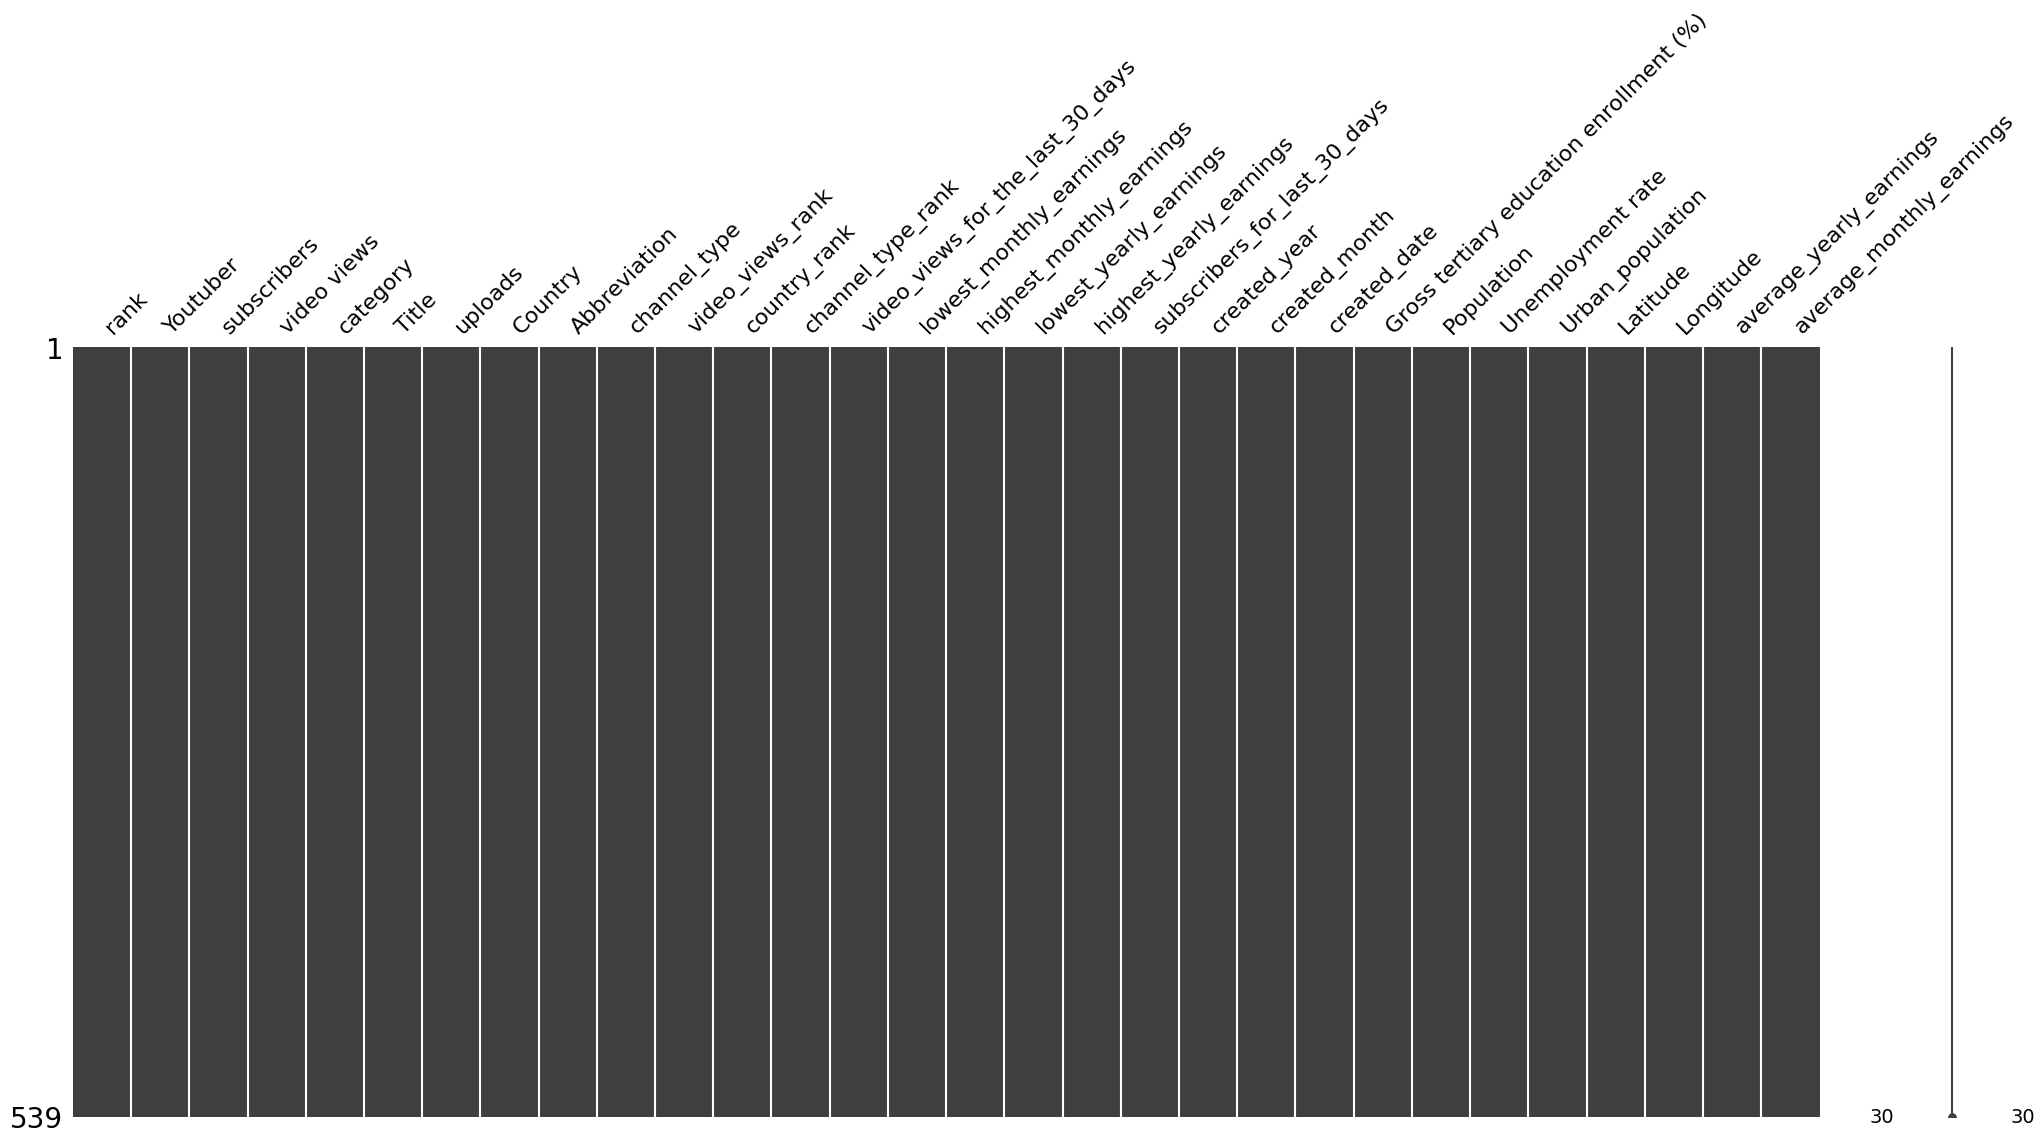

In [ ]:
msno.matrix(df)

In [ ]:
df['created_year'].min()

2006.0

As there are many missing values, I will remove the data with null values. Moreover, there is a wrong data value, which has created year equals to 1970 (YouTube was created in 2005, there is no way that the channel was created before that).

In [ ]:
df = df.dropna()
df.drop(df.loc[df['created_year'] == 1970].index, inplace=True)

In [ ]:
df = df.dropna()
df.drop(df.loc[df['created_year'] == 1990].index, inplace=True)

In [ ]:
df = df.dropna()
df.drop(df.loc[df['created_year'] == 2005].index, inplace=True)

In [ ]:
color_scheme = px.colors.sequential.Reds

***Univariate Analysis**

YouTube Channel Started Date Trend


In [ ]:
year_counts = df['created_year'].value_counts().sort_index()

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=year_counts.index,
        y=year_counts.values,
        fill='tozeroy',
        line_color='darkred',
        mode='lines+markers'
    )
)

fig.update_layout(
    title_text='YouTube Channels Created Year',
    template='plotly_white',
    xaxis=dict(
        title='Year',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Number of Channels',
        titlefont_size=16
    ),
)
fig.show()

Top 100 Most Subscribed YouTube Channel Names
¶

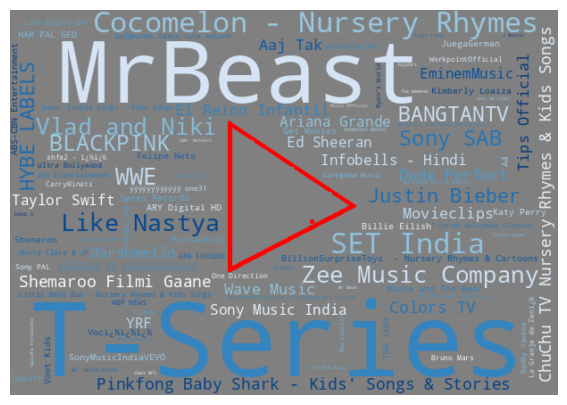

In [ ]:
youtubers_data = dict(zip(df['Youtuber'].tolist(), df['subscribers'].tolist()))

plt.figure(figsize=(30,5))

response = requests.get('https://cached.imagescaler.hbpl.co.uk/resize/scaleWidth/952/cached.offlinehbpl.hbpl.co.uk/news/ORP/YouTube-icon-full_color-20150527090518393.png')
mask_image = np.array(Image.open(BytesIO(response.content)))

wc = WordCloud(width=800,
               height=500,
               max_words=100,
               mask=mask_image,
               colormap='Blues_r',
               contour_color='red',
               contour_width=3,
               background_color='grey').generate_from_frequencies(youtubers_data)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
top10_most_subscribed_channels = df[:10]
fig = px.sunburst(
    top10_most_subscribed_channels,
    path=['Youtuber', 'Country'],
    values='subscribers',
    color='subscribers',
    color_continuous_scale='blues'
)
fig.update_layout(
    title_text='Top 10 Most Subscribed YouTubers',
    uniformtext=dict(minsize=8, mode='hide'))
fig.show()

**Video Views, Video Uploads and Subscribers**


In [ ]:
fig = make_subplots(rows=1, cols=3)

fig.update_layout(title_text='Boxplot of Video Views & Video Uploads & Subscribers',
                  uniformtext_minsize=12,
                  uniformtext_mode='hide')

fig.add_trace(go.Box(y=df['video views'],
                     name='Video Views',
                     boxpoints='outliers',
                     marker_color=color_scheme[6],
                     line_color=color_scheme[3]), row=1, col=1)

fig.add_trace(go.Box(y=df['uploads'],
                     name='Video Uploads',
                     boxpoints='outliers',
                     marker_color=color_scheme[7],
                     line_color=color_scheme[6]), row=1, col=2)

fig.add_trace(go.Box(y=df['subscribers'],
                     name='Subscribers',
                     boxpoints='outliers',
                     marker_color=color_scheme[6],
                     line_color=color_scheme[4]), row=1, col=3)

fig.update_layout(
    template='plotly_white'
)

fig.show()



**yearly earning**

In [ ]:
df['average_yearly_earnings'] = (df['lowest_yearly_earnings'] + df['highest_yearly_earnings']) / 2
df['average_monthly_earnings'] = (df['lowest_monthly_earnings'] + df['highest_monthly_earnings']) / 2

In [ ]:
fig = px.histogram(df, x='average_yearly_earnings', marginal='box',
                   color_discrete_sequence=['grey'])

fig.update_layout(
    title_text='YouTubers Yearly Earnings',
    template='plotly_white',
    xaxis=dict(
        title='Yearly Earnings',
        titlefont_size=16
    ),
    yaxis=dict(
        title='',
        titlefont_size=16
    ),
)
fig.update_traces(marker_line_color='black',
                  marker_line_width=1,
                  opacity=0.8)
fig.show()

The Asian YouTube channel with the most subscribers is the Indian music label T-Series, with 205 million subscribers. Other famous Asian YouTubers include Carry Minati, Nigahiga, Atta Halilintar, HikakinTV and Ricis Official.


**Channel  Category**

In [ ]:
category = df['category'].value_counts().sort_values(ascending=True)

fig = px.pie(values=category.values,
             names=category.index,
             color_discrete_sequence=color_scheme)

fig.update_traces(textposition='inside',
                  textfont_size=10,
                  textinfo='percent+label')

fig.update_layout(title_text="Category Pie Graph",
                  uniformtext_minsize=10,
                  uniformtext_mode='hide',
                  template ='plotly_white')

fig.show()


The top four content categories watched by YouTube users are comedy, music, entertainment/pop culture, and "how to."

**Geographical Distribution**

In [ ]:
country_counts = df['Country'].value_counts()[:15]
fig = go.Figure(go.Funnel(
    y=country_counts.index,
    x=country_counts.values,
    textinfo='value',
    marker={'color': color_scheme}
))

fig.update_layout(
    title_text='Top 15 Country Distribution',
    template='plotly_white'
)
fig.show()


United States, India, Brazil are top3 countries where profitable youtubers are distributed.




**Earning Analysis**

** Video Views, Uploads, Subscribers vs Yearly Earnings


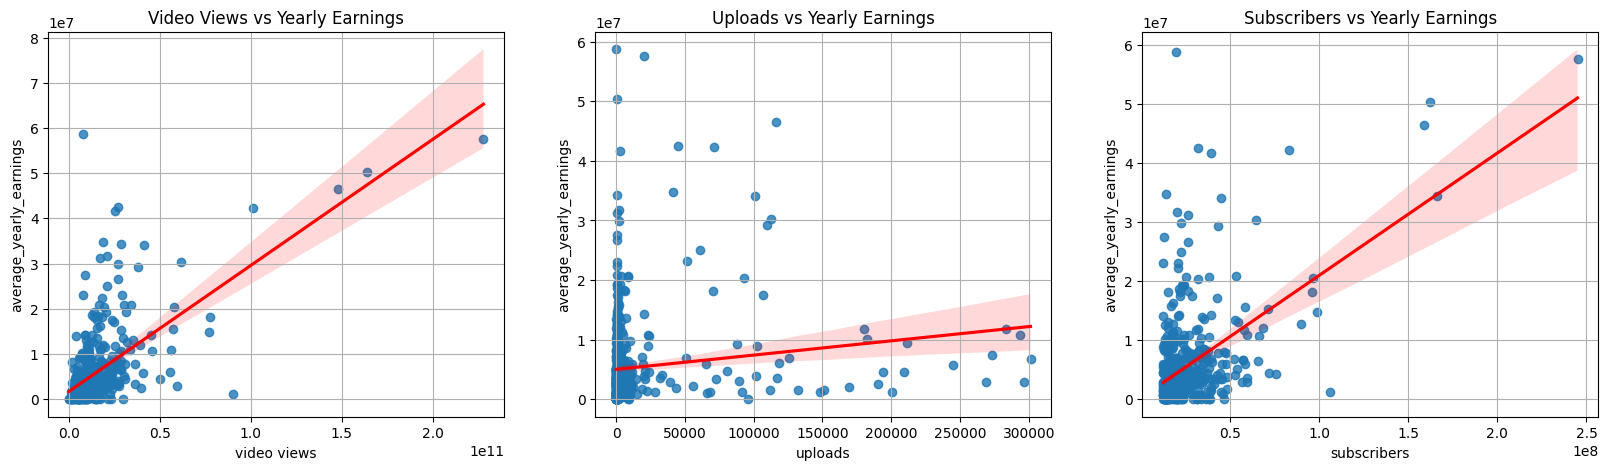

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

sns.regplot(ax=axs[0], data=df, x='video views', y='average_yearly_earnings', line_kws={'color': 'red'})
sns.regplot(ax=axs[1], data=df, x='uploads', y='average_yearly_earnings', line_kws={'color': 'red'})
sns.regplot(ax=axs[2], data=df, x='subscribers', y='average_yearly_earnings', line_kws={'color': 'red'})

axs[0].grid(True)
axs[0].set_title('Video Views vs Yearly Earnings')
axs[1].grid(True)
axs[1].set_title('Uploads vs Yearly Earnings')
axs[2].grid(True)
axs[2].set_title('Subscribers vs Yearly Earnings')
plt.show()


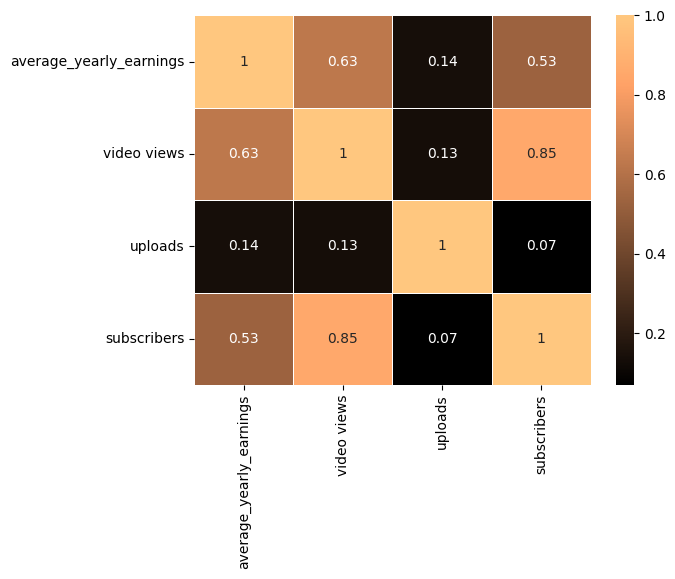

In [ ]:
df_corr = df[['average_yearly_earnings', 'video views', 'uploads', 'subscribers']]
corr = df_corr.corr()
sns.heatmap(corr, annot=True, linewidth=0.5, cmap='copper')
plt.show()

Video views are highly correlated with yearly earnings, and video views have high positive correlation with subscribers.




**Category vs Yearly Earnings**

In [ ]:
categories = df.groupby('category')['average_yearly_earnings'].mean().sort_values(ascending=True)

fig = go.Figure(data=px.bar(x=categories.index,
                            y=categories.values,
                            color = categories.index,
                            color_discrete_sequence=color_scheme,
                            title='Average Yearly Earnings by Category',
                            template = 'plotly_white',
                            text = np.round(categories.values/1000000,2),
                            height=500))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.update_layout(
    xaxis=dict(
        title='Category',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Average Yearly Earnings',
        titlefont_size=16
    ),
)

fig.show()


In [ ]:
fig = px.scatter(df, x="subscribers", y="average_yearly_earnings",
                 size="average_yearly_earnings", color="category", size_max=60,
                 title="Categories with Video Views and Yearly Earnings",
                 template = 'plotly_white')

lst = [0,1,2,3,4,5,6,7,8]
for idx in lst:
    fig.data[idx].marker.line.width = 4
    fig.data[idx].marker.line.color = 'black'

fig.update_layout(
    xaxis=dict(
        title='Subscribers',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Average Yearly Earnings',
        titlefont_size=18
    ),
)
fig.show()

**Geographical Distribution vs Yearly Earnings**

Top 3 Most Earning Countries in Each Category

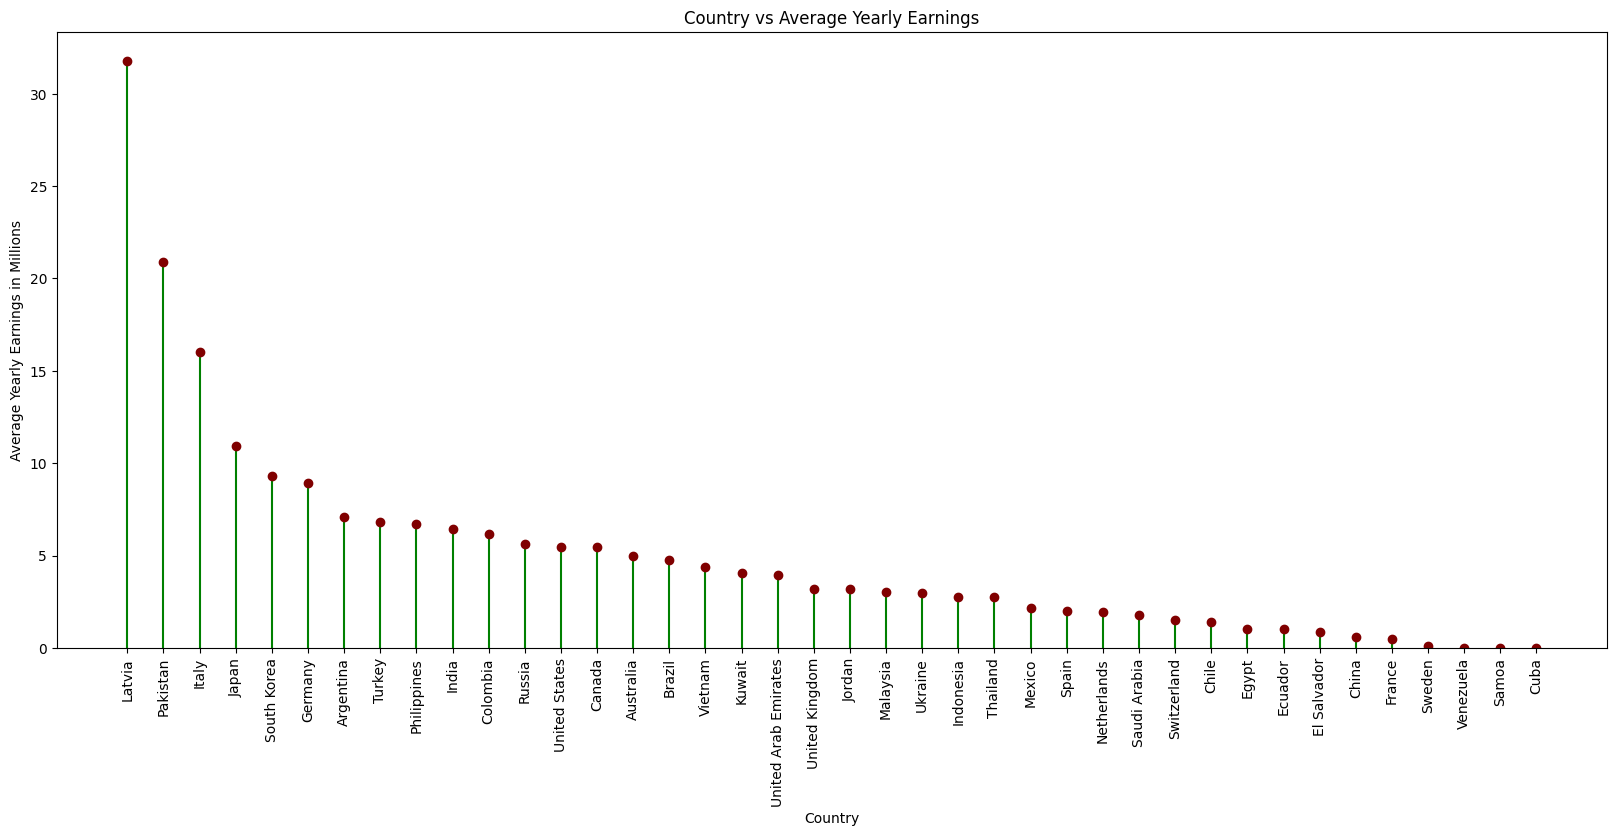

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

country_avg_earnings = df.groupby('Country')['average_yearly_earnings'].mean().sort_values(ascending=False)

x = country_avg_earnings.index.tolist()
y = np.divide(country_avg_earnings.values.tolist(), 1000000)
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.set_ylim(0)
ax.plot(x, y, 'o', color='maroon')
ax.set_xticklabels(x, rotation=90)
ax.set_xlabel('Country')
ax.set_ylabel("Average Yearly Earnings in Millions")
ax.set_title("Country vs Average Yearly Earnings")
plt.show()

In [ ]:
cat_lst = df['category'].unique().tolist()
def extract_top5_countries(df):
    frames = []
    for cat in cat_lst:
        cat_df = df.loc[df['category'] == cat]
        top5_country = cat_df.groupby('Country')['average_yearly_earnings'].mean()[:5].index.tolist()
        cat_df = cat_df.loc[df['Country'].isin(top5_country)]
        frames.append(cat_df)
    new_df = pd.concat(frames)
    return new_df

In [ ]:
country_cat_df = extract_top5_countries(df)
fig = px.treemap(country_cat_df, path=['category', 'Country'], color='Country', color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_layout(
    title_text='Top 5 Most Earning Countries in Respective Category')
fig.show()



From the treemap, we can easily see that YouTube Channels published in India and Brazil have high earnings in each cateogry.


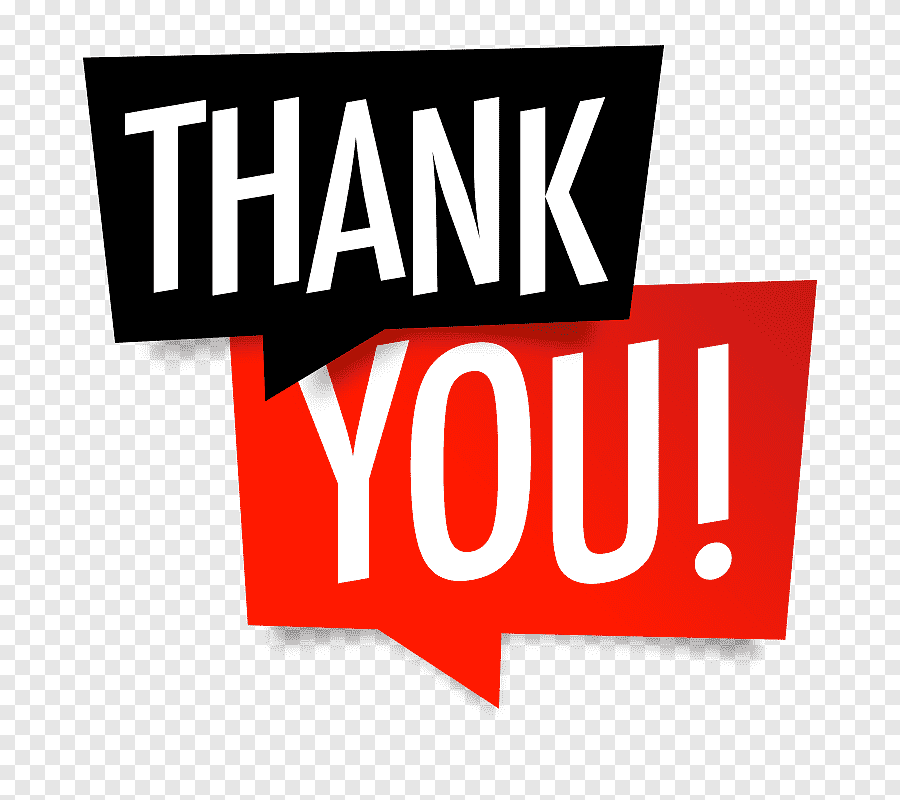